# Pitch Histogams
## Pitch Speed

In [1]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np
import json

In [2]:
# Read Data
hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'
no_hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-nohit'
data = []

for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

for filename in os.listdir(no_hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

In [3]:
# Get Pitch Types
pitch_type_data = []
pitch_type_data = [cur_data['summary_acts']['pitch']['type'] for cur_data in data if cur_data['summary_acts']['pitch']['type']]
pitch_type_types = list(set(pitch_type_data))
print(pitch_type_types)

['Slider', 'FourSeamFastball', 'Sinker', 'Curveball', 'Cutter', 'Changeup']


In [4]:
pitch_speed = [[] for _ in range(len(pitch_type_types))]

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['speed']['mph']):
        index = pitch_type_types.index(cur_data['summary_acts']['pitch']['type'])
        pitch_speed[index].append(cur_data['summary_acts']['pitch']['speed']['mph'])

In [5]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly

In [6]:
plotly.offline.init_notebook_mode(connected=True)

In [7]:
# Calculate the minimum and maximum speed
min_speed = min(min(speed) for speed in pitch_speed)
max_speed = max(max(speed) for speed in pitch_speed)

# Create subplots
fig = make_subplots(rows=len(pitch_type_types), cols=1, subplot_titles=pitch_type_types)

# Add histograms to subplots
for i in range(len(pitch_type_types)):
    hist = go.Histogram(
        x=pitch_speed[i],
        nbinsx=6,
        marker_color='red',
        marker_line_color='black',
        marker_line_width=1
    )

    fig.add_trace(hist, row=i+1, col=1)

    # Update x and y axis labels for each subplot
    fig.update_xaxes(title_text="Speed (mph)", row=i+1, col=1)
    fig.update_yaxes(title_text="Frequency", row=i+1, col=1)

# Update layout
fig.update_layout(
    height=1000,  # Adjust height as needed
    width=500,   # Adjust width as needed
    title_text='Pitch Initial Speed Frequency',
    showlegend=False
)
fig.show()

In [8]:
# Save the plot as a PNG file
# fig.write_image("Pitch Initial Speed Frequency.png", engine='kaleido')

In [9]:
# Overlay
fig = go.Figure()
for i in range(len(pitch_type_types)):
    fig.add_trace(go.Histogram(x=pitch_speed[i], name=pitch_type_types[i]))

# Overlay both histograms
fig.update_layout(barmode='overlay', title_text='Pitch Initial Speed Frequency')
fig.update_xaxes(title_text="Speed (mph)")
fig.update_yaxes(title_text="Frequency")

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

# fig.write_image("Pitch Initial Speed Frequency Histogram.png", engine='kaleido')

## Pitch Spin Histogram

In [35]:
pitch_spin = [[] for _ in range(len(pitch_type_types))]

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['spin']['rpm']):
        index = pitch_type_types.index(cur_data['summary_acts']['pitch']['type'])
        pitch_speed[index].append(cur_data['summary_acts']['pitch']['spin']['rpm'])

In [12]:
# Overlay
fig = go.Figure()
for i in range(len(pitch_type_types)):
    fig.add_trace(go.Histogram(x=pitch_speed[i], name=pitch_type_types[i]))
    
# Overlay both histograms
fig.update_layout(barmode='overlay', title_text='Pitch Initial Spin Frequency')
fig.update_xaxes(title_text="Spin (rpm)")
fig.update_yaxes(title_text="Frequency")

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

# fig.write_image("Pitch Initial Spin Frequency Histogram.png", engine='kaleido')

## Pitch Info by Result
### Speed Based on Result

In [24]:
import pandas as pd
import plotly.express as px

In [25]:
speed_result_list = []

for cur_data in data:
    speed = cur_data['summary_acts']['pitch']['speed']['mph']
    result = cur_data['summary_acts']['pitch']['result']
    
    if speed != "" and result != "":
        cur_row = {
            "Speed": speed,
            "Result": result
        }
        speed_result_list.append(cur_row)

# Create DataFrame from the list of dictionaries
speed_result_df = pd.DataFrame(speed_result_list)

display(speed_result_df)

Speed       Result
0      94.0         Ball
1      92.0       Strike
2      84.0  HitIntoPlay
3      92.0  HitIntoPlay
4      78.0       Strike
...     ...          ...
1194   88.0         Ball
1195   90.0         Ball
1196   94.0       Strike
1197   92.0         Ball
1198   94.0       Strike

[1199 rows x 2 columns]

In [29]:
fig = px.histogram(speed_result_df, x="Speed", color="Result", title="Pitch Speed Distribution by Result")
fig.update_xaxes(title_text="Speed (mph)")
fig.show()

### Spin Based on Result

In [32]:
spin_result_list = []

for cur_data in data:
    spin = cur_data['summary_acts']['pitch']['spin']['rpm']
    result = cur_data['summary_acts']['pitch']['result']
    
    if spin != "" and result != "":
        cur_row = {
            "Spin": spin,
            "Result": result
        }
        spin_result_list.append(cur_row)

# Create DataFrame from the list of dictionaries
spin_result_df = pd.DataFrame(spin_result_list)

display(spin_result_df)

Spin       Result
0      260.0         Ball
1     2310.0       Strike
2     2720.0  HitIntoPlay
3     2290.0  HitIntoPlay
4     2040.0       Strike
...      ...          ...
1194  2690.0         Ball
1195  2280.0         Ball
1196  2280.0       Strike
1197  2310.0         Ball
1198  2190.0       Strike

[1199 rows x 2 columns]

In [34]:
fig = px.histogram(spin_result_df, x="Spin", color="Result", title="Pitch Spin Distribution by Result")
fig.update_xaxes(title_text="Spin (rpm)")
fig.show()

# Pitch Density Heatmap
## Pitch type and Result

In [13]:
import plotly.express as px
import pandas as pd

In [14]:
pitch_type_data = []
pitch_result_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['result']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_result_data.append(cur_data['summary_acts']['pitch']['result'])

In [15]:
pitch_type_types = list(set(pitch_type_data))
pitch_result_types = list(set(pitch_result_data))
print("Pitch Types:", pitch_type_types)
print("Pitch Results:", pitch_result_types)

Pitch Types: ['Sinker', 'Cutter', 'Changeup', 'FourSeamFastball', 'Curveball', 'Slider']
Pitch Results: ['HitIntoPlay', 'Strike', 'Ball']


In [16]:
pitch_matrix = np.zeros([len(pitch_type_types), len(pitch_result_types)])
for i in range(len(pitch_type_data)):
    pitch_matrix[pitch_type_types.index(pitch_type_data[i])][pitch_result_types.index(pitch_result_data[i])] += 1
# print(pitch_matrix)

#convert to dictionary
type_result_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(pitch_result_types):
    type_result_dict[outcome] = pitch_matrix[:, i].tolist()
# print(type_result_dict)

#Make dataframe
type_result_df = pd.DataFrame(type_result_dict)

# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_df = pd.melt(type_result_df, id_vars='Pitch Type', var_name='Outcome', value_name='Count')
print(melted_df)

          Pitch Type      Outcome  Count
0             Sinker  HitIntoPlay   13.0
1             Cutter  HitIntoPlay    2.0
2           Changeup  HitIntoPlay    8.0
3   FourSeamFastball  HitIntoPlay   10.0
4          Curveball  HitIntoPlay    2.0
5             Slider  HitIntoPlay    9.0
6             Sinker       Strike   51.0
7             Cutter       Strike    8.0
8           Changeup       Strike   12.0
9   FourSeamFastball       Strike   15.0
10         Curveball       Strike   16.0
11            Slider       Strike   34.0
12            Sinker         Ball   40.0
13            Cutter         Ball   12.0
14          Changeup         Ball   10.0
15  FourSeamFastball         Ball    7.0
16         Curveball         Ball   15.0
17            Slider         Ball   29.0


In [17]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_df.pivot(index='Pitch Type', columns='Outcome', values='Count'),
                x=melted_df['Outcome'].unique(),
                y=melted_df['Pitch Type'].unique(),
                labels=dict(x='Outcome', y='Pitch Type', color='Count'),
                title='Pitch Type Outcome Counts',
                width=450,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

# fig.write_image("Pitch Type Outcomes.png", engine='kaleido')

## Pitch Type and Action

In [37]:
pitch_type_data = []
pitch_action_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['action']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_action_data.append(cur_data['summary_acts']['pitch']['action'])

In [38]:
pitch_type_types = list(set(pitch_type_data))
pitch_action_types = list(set(pitch_action_data))
print("Pitch Types:", pitch_type_types)
print("Pitch Action:", pitch_action_types)

Pitch Types: ['Slider', 'FourSeamFastball', 'Sinker', 'Curveball', 'Cutter', 'Changeup']
Pitch Action: ['Called', 'HitByPitch', 'BallInDirt', 'Foul', 'FoulTip']


In [39]:
pitch_type_action_matrix = np.zeros([len(pitch_type_types), len(pitch_action_types)])
for i in range(len(pitch_type_data)):
    pitch_type_action_matrix[pitch_type_types.index(pitch_type_data[i])][pitch_action_types.index(pitch_action_data[i])] += 1
# print(pitch_type_action_matrix)

#convert to dictionary
type_action_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(pitch_action_types):
    type_action_dict[outcome] = pitch_type_action_matrix[:, i].tolist()
print(type_action_dict)

#Make dataframe
type_action_df = pd.DataFrame(type_action_dict)
# print(type_action_df)

# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_type_action_df = pd.melt(type_action_df, id_vars='Pitch Type', var_name='Pitch Action', value_name='Count')
print(melted_type_action_df)

{'Pitch Type': ['Slider', 'FourSeamFastball', 'Sinker', 'Curveball', 'Cutter', 'Changeup'], 'Called': [38.0, 15.0, 57.0, 18.0, 15.0, 19.0], 'HitByPitch': [1.0, 0.0, 2.0, 0.0, 0.0, 0.0], 'BallInDirt': [2.0, 0.0, 0.0, 3.0, 0.0, 0.0], 'Foul': [12.0, 5.0, 19.0, 3.0, 3.0, 1.0], 'FoulTip': [0.0, 0.0, 2.0, 0.0, 0.0, 0.0]}
          Pitch Type Pitch Action  Count
0             Slider       Called   38.0
1   FourSeamFastball       Called   15.0
2             Sinker       Called   57.0
3          Curveball       Called   18.0
4             Cutter       Called   15.0
5           Changeup       Called   19.0
6             Slider   HitByPitch    1.0
7   FourSeamFastball   HitByPitch    0.0
8             Sinker   HitByPitch    2.0
9          Curveball   HitByPitch    0.0
10            Cutter   HitByPitch    0.0
11          Changeup   HitByPitch    0.0
12            Slider   BallInDirt    2.0
13  FourSeamFastball   BallInDirt    0.0
14            Sinker   BallInDirt    0.0
15         Curveball   Ball

In [21]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_type_action_df.pivot(index='Pitch Type', columns='Pitch Action', values='Count'),
                x=melted_type_action_df['Pitch Action'].unique(),
                y=melted_type_action_df['Pitch Type'].unique(),
                labels=dict(x='Pitch Action', y='Pitch Type', color='Count'),
                title='Pitch Type Action Counts',
                width=450,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

# fig.write_image("Pitch Type Action Counts.png", engine='kaleido')

## Pitch Type By General Game Info
### Pitch Type By Inning Number

In [64]:
pitch_type_data = []
inning_num_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_score']['runs']['innings']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        inning_num_data.append(len(cur_data['summary_score']['runs']['innings']))

In [65]:
pitch_type_types = list(set(pitch_type_data))
inning_num_types = list(set(inning_num_data))
print("Pitch Types:", pitch_type_types)
print("Innings:", inning_num_types)

Pitch Types: ['Slider', 'FourSeamFastball', 'Sinker', 'Curveball', 'Cutter', 'Changeup']
Innings: [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [66]:
pitch_type_inning_matrix = np.zeros([len(pitch_type_types), len(inning_num_types)])
for i in range(len(pitch_type_data)):
    pitch_type_inning_matrix[pitch_type_types.index(pitch_type_data[i])][inning_num_types.index(inning_num_data[i])] += 1

#convert to dictionary
pitch_type_inning_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(inning_num_types):
    pitch_type_inning_dict[outcome] = pitch_type_inning_matrix[:, i].tolist()
display(pitch_type_inning_dict)

#Make dataframe
pitch_type_inning_df = pd.DataFrame(pitch_type_inning_dict)

# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_pitch_type_inning_df = pd.melt(pitch_type_inning_df, id_vars='Pitch Type', var_name='Inning Num', value_name='Count')
print(melted_pitch_type_inning_df)

{'Pitch Type': ['Slider',
  'FourSeamFastball',
  'Sinker',
  'Curveball',
  'Cutter',
  'Changeup'],
 1: [4.0, 2.0, 10.0, 5.0, 2.0, 3.0],
 2: [4.0, 1.0, 15.0, 4.0, 5.0, 1.0],
 3: [6.0, 5.0, 26.0, 12.0, 6.0, 2.0],
 4: [5.0, 10.0, 6.0, 3.0, 5.0, 0.0],
 5: [22.0, 2.0, 14.0, 0.0, 1.0, 2.0],
 6: [12.0, 0.0, 7.0, 2.0, 0.0, 11.0],
 7: [11.0, 5.0, 0.0, 3.0, 0.0, 7.0],
 8: [2.0, 3.0, 25.0, 2.0, 3.0, 4.0],
 9: [6.0, 4.0, 1.0, 2.0, 0.0, 0.0]}

          Pitch Type Inning Num  Count
0             Slider          1    4.0
1   FourSeamFastball          1    2.0
2             Sinker          1   10.0
3          Curveball          1    5.0
4             Cutter          1    2.0
5           Changeup          1    3.0
6             Slider          2    4.0
7   FourSeamFastball          2    1.0
8             Sinker          2   15.0
9          Curveball          2    4.0
10            Cutter          2    5.0
11          Changeup          2    1.0
12            Slider          3    6.0
13  FourSeamFastball          3    5.0
14            Sinker          3   26.0
15         Curveball          3   12.0
16            Cutter          3    6.0
17          Changeup          3    2.0
18            Slider          4    5.0
19  FourSeamFastball          4   10.0
20            Sinker          4    6.0
21         Curveball          4    3.0
22            Cutter          4    5.0
23          Changeup          4    0.0
24            Slider     

In [67]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_pitch_type_inning_df.pivot(index='Pitch Type', columns='Inning Num', values='Count'),
                x=melted_pitch_type_inning_df['Inning Num'].unique(),
                y=melted_pitch_type_inning_df['Pitch Type'].unique(),
                labels=dict(x='Inning Num', y='Pitch Type', color='Count'),
                title='Pitch Type by Inning Number Counts',
                width=700,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

# fig.write_image("Pitch Type Action Counts.png", engine='kaleido')

### Pitch Type By Outs in Inning

In [70]:
pitch_type_data = []
inning_outs_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_score']['outs']['inning']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        inning_outs_data.append(cur_data['summary_score']['outs']['inning'])

In [71]:
pitch_type_types = list(set(pitch_type_data))
inning_outs_types = list(set(inning_outs_data))
print("Pitch Types:", pitch_type_types)
print("Innings Outs:", inning_outs_types)

Pitch Types: ['Slider', 'FourSeamFastball', 'Sinker', 'Curveball', 'Cutter', 'Changeup']
Innings Outs: [1, 2]


In [73]:
pitch_type_inning_out_matrix = np.zeros([len(pitch_type_types), len(inning_outs_types)])
for i in range(len(pitch_type_data)):
    pitch_type_inning_out_matrix[pitch_type_types.index(pitch_type_data[i])][inning_outs_types.index(inning_outs_data[i])] += 1

#convert to dictionary
pitch_type_inning_out_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(inning_outs_types):
    pitch_type_inning_out_dict[outcome] = pitch_type_inning_out_matrix[:, i].tolist()
# display(pitch_type_inning_out_dict)

#Make dataframe
pitch_type_inning_out_df = pd.DataFrame(pitch_type_inning_out_dict)

# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_pitch_type_inning_out_df = pd.melt(pitch_type_inning_out_df, id_vars='Pitch Type', var_name='Inning Outs', value_name='Count')
display(melted_pitch_type_inning_out_df)

Pitch Type Inning Outs  Count
0             Slider           1   26.0
1   FourSeamFastball           1    9.0
2             Sinker           1   29.0
3          Curveball           1   11.0
4             Cutter           1    5.0
5           Changeup           1   12.0
6             Slider           2   33.0
7   FourSeamFastball           2   14.0
8             Sinker           2   36.0
9          Curveball           2   12.0
10            Cutter           2    7.0
11          Changeup           2    9.0

In [77]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_pitch_type_inning_out_df.pivot(index='Pitch Type', columns='Inning Outs', values='Count'),
                x=melted_pitch_type_inning_out_df['Inning Outs'].unique(),
                y=melted_pitch_type_inning_out_df['Pitch Type'].unique(),
                labels=dict(x='Inning Outs', y='Pitch Type', color='Count'),
                title='Pitch Type by Outs in Inning Count',
                width=400,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

In [84]:
#Calculate percent (within that column, ex: so what % of pitches when there was 1 out is a slider)
num_one_out = melted_pitch_type_inning_out_df.loc[melted_pitch_type_inning_out_df['Inning Outs'] == 1, 'Count'].sum()
num_two_out = melted_pitch_type_inning_out_df.loc[melted_pitch_type_inning_out_df['Inning Outs'] == 2, 'Count'].sum()
print(num_one_out, num_two_out)
melted_pitch_type_inning_out_df['Percent'] = np.where(melted_pitch_type_inning_out_df['Inning Outs'] == 5, melted_pitch_type_inning_out_df['Count'] / num_one_out, melted_pitch_type_inning_out_df['Count'] / num_two_out)
display(melted_pitch_type_inning_out_df)

92.0 111.0


Pitch Type Inning Outs  Count   percent   Percent
0             Slider           1   26.0  0.234234  0.234234
1   FourSeamFastball           1    9.0  0.081081  0.081081
2             Sinker           1   29.0  0.261261  0.261261
3          Curveball           1   11.0  0.099099  0.099099
4             Cutter           1    5.0  0.045045  0.045045
5           Changeup           1   12.0  0.108108  0.108108
6             Slider           2   33.0  0.297297  0.297297
7   FourSeamFastball           2   14.0  0.126126  0.126126
8             Sinker           2   36.0  0.324324  0.324324
9          Curveball           2   12.0  0.108108  0.108108
10            Cutter           2    7.0  0.063063  0.063063
11          Changeup           2    9.0  0.081081  0.081081

# Predictors
## Pitch Type Classification

In [22]:
# Get intial speed, spin, and pitch type as parallel lists
pitch_type_data = []
pitch_speed_data = []
pitch_spin_data = []

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['speed']['mph'] and cur_data['summary_acts']['pitch']['spin']['rpm']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_speed_data.append(cur_data['summary_acts']['pitch']['speed']['mph'])
        pitch_spin_data.append(cur_data['summary_acts']['pitch']['spin']['rpm'])

In [23]:
combined_speed_spin = [list(item) for item in zip(pitch_speed_data, pitch_spin_data)]
print(len(combined_speed_spin))
print(len(pitch_type_data))

292
292


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#divide data
train_x, test_x, train_y, test_y = train_test_split(combined_speed_spin, pitch_type_data, test_size=0.2, random_state=42)

In [26]:
# Feature scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [27]:
# Initialize and train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_x_scaled, train_y)

RandomForestClassifier(random_state=42)

In [28]:
pred_y = classifier.predict(test_x_scaled)

In [29]:
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


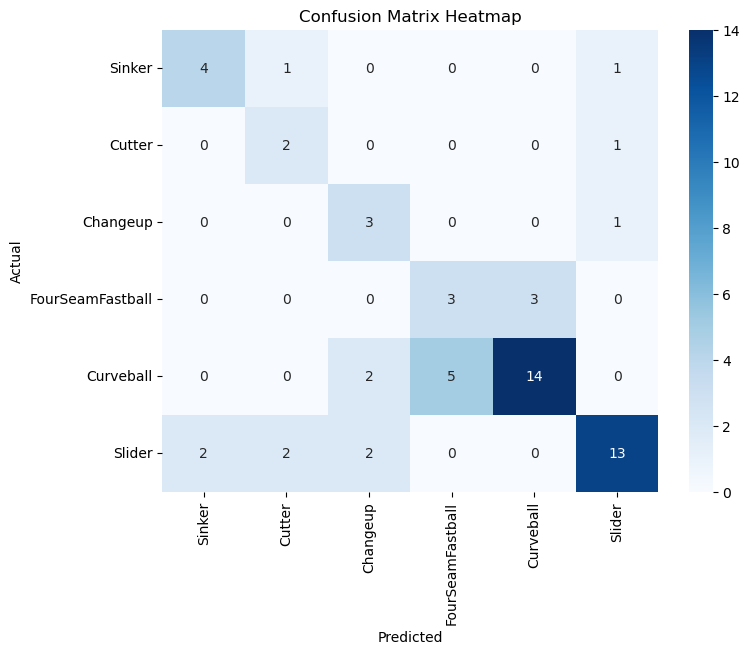

In [30]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)

# get labels
pitch_type_data_options = list(set(pitch_type_data))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pitch_type_data_options, yticklabels=pitch_type_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Pitch Result Prediction
### Random Forest Classifier

In [31]:
# Read Data
hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'
no_hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-nohit'
data = []

for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

for filename in os.listdir(no_hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

In [32]:
# Get intial speed, spin, and pitch type as parallel lists
pitch_type_data = []
pitch_speed_data = []
pitch_spin_data = []
pitch_result_data = []

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['speed']['mph'] and cur_data['summary_acts']['pitch']['spin']['rpm'] and cur_data['summary_acts']['pitch']['result']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_speed_data.append(cur_data['summary_acts']['pitch']['speed']['mph'])
        pitch_spin_data.append(cur_data['summary_acts']['pitch']['spin']['rpm'])
        pitch_result_data.append(cur_data['summary_acts']['pitch']['result'])

In [33]:
data = {
    'Type': pitch_type_data,
    'Speed': pitch_speed_data,
    'Spin': pitch_spin_data
}
df = pd.DataFrame(data)

In [34]:
#One-Hot Encoding to handle string data in type
df_encoded = pd.get_dummies(df, columns=['Type'])

In [35]:
#divide data
train_x, test_x, train_y, test_y = train_test_split(df_encoded, pitch_result_data, test_size=0.2, random_state=42)

In [36]:
# Initialize and train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [37]:
pred_y = classifier.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.44


### Logistic Regression

In [38]:
!pip install seaborn==0.13.0

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# Feature scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [41]:
classifier = LogisticRegression(random_state=42)
classifier.fit(train_x_scaled, train_y)

LogisticRegression(random_state=42)

In [42]:
pred_y = classifier.predict(test_x_scaled)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

[[ 5  1 11]
 [ 4  0  7]
 [ 7  0 24]]


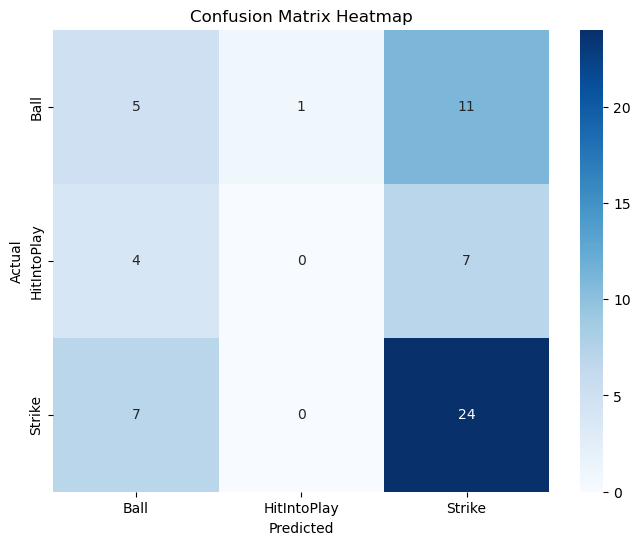

In [44]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)
print(conf_matrix)

# get labels
pitch_result_data_options = sorted(list(set(pitch_result_data)))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=pitch_result_data_options,
            yticklabels=pitch_result_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier = DecisionTreeClassifier(random_state=15)
classifier.fit(train_x_scaled, train_y)

DecisionTreeClassifier(random_state=15)

In [47]:
pred_y = classifier.predict(test_x_scaled)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.42


# Visualizing Pitch and Hit Relationships